# Naive Bayes

Implementing from scratch an efficient Naive Bayes classifier using only *numpy*.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

%matplotlib inline

In [2]:
n_points = 1000
n_classes = 3

coords, labels = make_classification(n_samples=n_points, n_features=2, n_classes=n_classes, 
                                     n_redundant=0, n_repeated=0, n_clusters_per_class=1)

coords_train, coords_test, labels_train, labels_test = train_test_split(coords, labels, test_size=0.3)

data = pd.DataFrame.from_dict({
    'x1': coords_train[:, 0],
    'x2': coords_train[:, 1],
    'label': labels_train
})

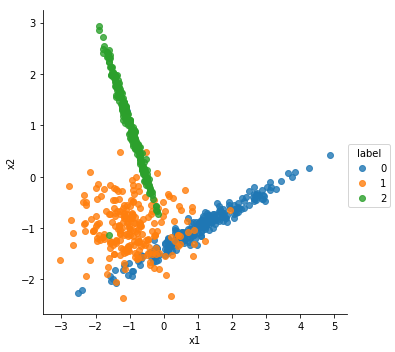

In [3]:
sns.lmplot(x="x1", y="x2", hue="label", data=data, fit_reg=False)

## Prior probabilities

In [4]:
C_priors = np.unique(labels_train, return_counts=True)[1] / labels_train.shape[0]

## Summary of the data

In [5]:
C_vs_feature_mean = np.zeros((n_classes, coords_train.shape[1]))
C_vs_feature_std = np.zeros((n_classes, coords_train.shape[1]))

for c in range(n_classes):
    c_coords = coords_train[labels_train == c]
    c_means = np.mean(c_coords, axis=0)
    c_stds = np.std(c_coords, axis=0)
    C_vs_feature_mean[c, :] = c_means
    C_vs_feature_std[c, :] = c_stds

## Prediction

In [6]:
def predict(X_test):
    predictions = np.zeros((X_test.shape[0], n_classes))
    for c in range(n_classes):
        c_prob = C_priors[c] * np.prod((1 / (np.sqrt(2*np.pi*C_vs_feature_std[c, :]**2)))*\
                                        np.exp(-(X_test - C_vs_feature_mean[c, :])**2/(2*C_vs_feature_std[c, :]**2)), axis=1)
        predictions[:, c] = c_prob
    return np.argmax(predictions, axis=1)

In [7]:
class_pred = predict(coords_test)

In [8]:
print(classification_report(y_pred=class_pred, y_true=labels_test))

             precision    recall  f1-score   support

          0       0.85      0.82      0.84        99
          1       0.74      0.83      0.78       104
          2       0.96      0.88      0.91        97

avg / total       0.85      0.84      0.84       300



## Plotting of the decision boundary

In [9]:
h = 0.02 # step size in the mesh

x1_min, x2_min = tuple(coords_test.min(0)*1.5)
x1_max, x2_max = tuple(coords_test.max(0)*1.5)
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))
Z = predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

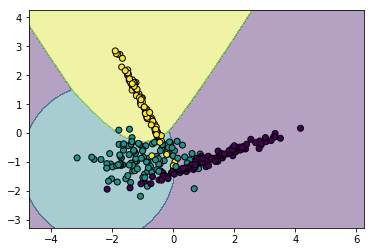

In [10]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(coords_test[:, 0], coords_test[:, 1], edgecolors='k', c=labels_test)